In [52]:
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns 

In [66]:
crash = pd.read_csv('crash_clean.csv')

In [5]:
crash.columns.values

array(['Unnamed: 0', 'Crash_ID', 'Crash_Fatal_Fl', 'Crash_Date',
       'Crash_Time', 'Rpt_Rdwy_Sys_ID', 'Rpt_Hwy_Num', 'Private_Dr_Fl',
       'Crash_Speed_Limit', 'At_Intrsct_Fl', 'Wthr_Cond_ID',
       'Light_Cond_ID', 'Traffic_Cntl_ID', 'Investigat_Notify_Time',
       'Obj_Struck_ID', 'Latitude', 'Longitude', 'Street_Name',
       'Street_Nbr', 'Street_Name_2', 'Crash_Sev_ID', 'Day_of_Week',
       'Tot_Injry_Cnt', 'Death_Cnt'], dtype=object)

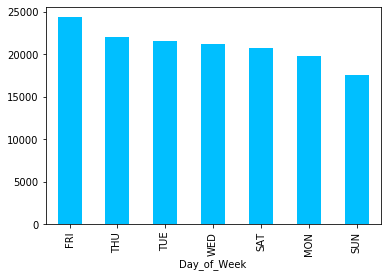

In [13]:
crash.groupby('Day_of_Week')['Crash_ID'].count().sort_values(ascending=False).plot(kind='bar',color='deepskyblue')

In [67]:
primary_person = pd.read_csv('primary_person_clean.csv')

In [19]:
primary_person.columns.values

array(['Unnamed: 0', 'Crash_ID', 'Prsn_Occpnt_Pos_ID',
       'Prsn_Injry_Sev_ID', 'Prsn_Age', 'Prsn_Ethnicity_ID',
       'Prsn_Gndr_ID', 'Prsn_Ejct_ID', 'Prsn_Rest_ID', 'Prsn_Airbag_ID',
       'Prsn_Helmet_ID', 'Prsn_Alc_Spec_Type_ID', 'Prsn_Alc_Rslt_ID',
       'Prsn_Bac_Test_Rslt', 'Prsn_Drg_Rslt_ID', 'Drvr_Drg_Cat_1_ID'],
      dtype=object)

In [29]:
primary_person['Prsn_Alc_Rslt_ID'].unique()
a = len(primary_person['Prsn_Alc_Rslt_ID'])
b = len(primary_person[primary_person['Prsn_Alc_Rslt_ID'].isna()])
(a-b)/a

0.016332728288187656

In [37]:
alcohol_df = primary_person[primary_person['Prsn_Alc_Rslt_ID'].notna()]
alcohol_df['Prsn_Alc_Spec_Type_ID'].unique()

array([1., 4., 2., 6., 5., 3.])

In [46]:
alcohol_df[['Prsn_Alc_Rslt_ID','Prsn_Alc_Spec_Type_ID']][100:200];

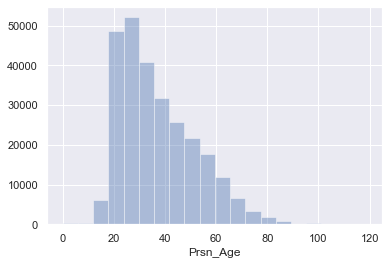

In [57]:
sns.set(color_codes=True)
sns.distplot(crash['Prsn_Age'], bins =20,kde= False)

In [58]:
import warnings
warnings.filterwarnings('ignore')

In [68]:
merged = crash.merge(primary_person, left_on='Crash_ID', right_on='Crash_ID')
# df = merged[['Crash_ID', 'Crash_Date', 'Prsn_Alc_Rslt_ID', 'Prsn_Injry_Sev_ID']]
# sum(df['Prsn_Alc_Rslt_ID'].notna())/len(df['Prsn_Alc_Rslt_ID'])

In [78]:
crash.head(10)
merged.head(5)
merge_alco=merged[merged['Prsn_Alc_Rslt_ID'].notna()]
import datetime as dt
merge_alco["Crash_Date"] = pd.to_datetime(merge_alco["Crash_Date"], format= "%m/%d/%Y")
merge_alco.head(5)

,Unnamed: 0_x,Crash_ID,Crash_Fatal_Fl,Crash_Date,Crash_Time,Rpt_Rdwy_Sys_ID,Rpt_Hwy_Num,Private_Dr_Fl,Crash_Speed_Limit,At_Intrsct_Fl,...,Prsn_Gndr_ID,Prsn_Ejct_ID,Prsn_Rest_ID,Prsn_Airbag_ID,Prsn_Helmet_ID,Prsn_Alc_Spec_Type_ID,Prsn_Alc_Rslt_ID,Prsn_Bac_Test_Rslt,Prsn_Drg_Rslt_ID,Drvr_Drg_Cat_1_ID
32,15,11154992,N,2010-01-17,02:32 AM,19,NaN,N,40,Y,...,2.0,1.0,1.0,2.0,97.0,1.0,1.0,0.110,97.0,97.0
219,118,11165625,N,2010-01-28,11:06 AM,2,290,N,55,N,...,1.0,1.0,1.0,2.0,97.0,4.0,2.0,0.000,97.0,97.0
257,141,11167484,N,2010-01-01,02:42 AM,19,NaN,Y,0,N,...,1.0,1.0,1.0,3.0,97.0,1.0,1.0,0.106,97.0,97.0
266,146,11167781,N,2010-01-19,06:31 PM,19,NaN,N,30,N,...,1.0,1.0,10.0,2.0,97.0,1.0,1.0,0.193,97.0,97.0
296,163,11168642,N,2010-01-22,02:28 AM,19,NaN,N,40,N,...,1.0,1.0,10.0,2.0,97.0,1.0,1.0,0.196,97.0,97.0


In [81]:
mask = (merge_alco["Crash_Date"] > dt.datetime(2014,6,1)) & (merge_alco["Crash_Date"] <= dt.datetime(2016,5,10)) | (merge_alco["Crash_Date"] > dt.datetime(2017,5,29))

In [96]:
rideshare = merge_alco[mask]
no_rideshare = merge_alco[~mask]
print(len(rideshare))
print(len(no_rideshare))
len(rideshare[rideshare['Prsn_Alc_Rslt_ID']==1])
print(len(rideshare[rideshare['Prsn_Alc_Rslt_ID']==1])/len(rideshare))
print(len(no_rideshare[no_rideshare['Prsn_Alc_Rslt_ID']==1])/len(no_rideshare))

1918
2761
0.9004171011470281
0.8663527707352409
